# Clustering Tut
## Matthew Dacre 2091295

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [13]:
#(a)

#Reading image
image = plt.imread("peppers.bmp")
#Reshaping the image into (x*y, 3)
imageReshape = image.reshape((image.shape[0]*image.shape[1], image.shape[2]))

In [22]:
def distance(x, c):
    #Returns distance from point x to point c
    #Using manhatten distance
    dis = 0
    for count, val in enumerate(c):
        dis +=  abs(x[count] - val)
    return dis

In [63]:
def center(k, dimension):
    #Returns 
    return (255*np.random.rand(k, dimension))

In [76]:
#(b)

#Generating new image
def kmeans(image, k):
    #Reshaping the image into (x*y, 3)
    imageReshape = image.reshape((image.shape[0]*image.shape[1], image.shape[2]))
    
    #Randomising k centers
    cent = center(k, len(imageReshape[1]))
    
    #Initialising center 
    pointClass = np.full(len(imageReshape), -1)
    
    #Looping through each pixel, finding its center
    for imageCount, imageVal in enumerate(imageReshape):
        #Progress printing
        if imageCount % 500 == 0:
            clear_output(wait=True)
            print("Percent done: " + str((imageCount/len(imageReshape))*100))
            
        #Find closest centroid
        distances = np.zeros(k)
        for i in range(k):
            distances[i] = distance(imageVal, cent[i])
            
        #Assigning class
        pointClass[imageCount] = np.where(distances == np.amin(distances))[0]
        
    #Assigning colours to centers
    centAve = np.zeros(cent.shape)
    countArr = np.bincount(pointClass)
    for count, val in enumerate(imageReshape):
        centAve[pointClass[count]] += val
    for i in range(len(countArr)):
        if not countArr[i] == 0:
            centAve[i] = centAve[i]/countArr[i]
            
    #Drawing new image
    pointClassReshape = pointClass.reshape(image.shape[0], image.shape[1])
    newImage = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype=int)
    for count, val in enumerate(image):
        for count2, val2 in enumerate(val):
            newImage[count, count2] = centAve[pointClassReshape[count, count2]].astype(int)
    return newImage

Percent done: 99.945068359375


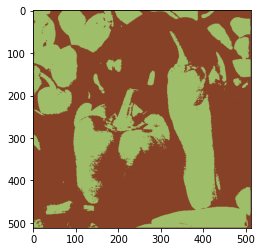

In [82]:
#(c)

image = plt.imread("peppers.bmp")
plt.imshow(kmeans(image, 2))

Percent done: 99.945068359375


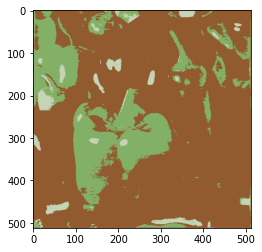

In [83]:
#(d)
image = plt.imread("peppers.bmp")
plt.imshow(kmeans(image, 4))

Percent done: 99.945068359375


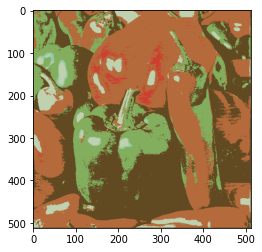

In [84]:
image = plt.imread("peppers.bmp")
plt.imshow(kmeans(image, 8))

Percent done: 99.945068359375


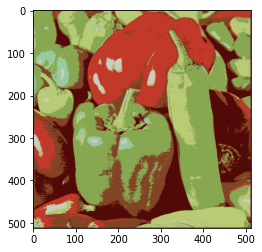

In [85]:
image = plt.imread("peppers.bmp")
plt.imshow(kmeans(image, 16))

Percent done: 99.945068359375


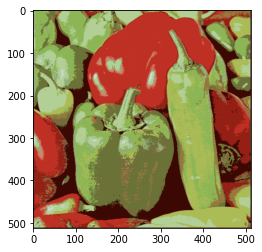

In [86]:
image = plt.imread("peppers.bmp")
plt.imshow(kmeans(image, 32))

Percent done: 99.945068359375


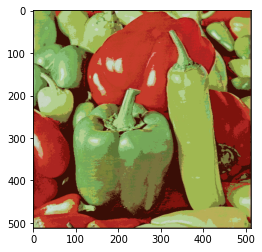

In [87]:
image = plt.imread("peppers.bmp")
plt.imshow(kmeans(image, 64))

Percent done: 99.5104087887593


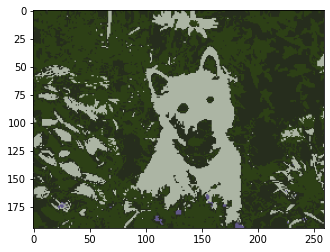

In [77]:
image = plt.imread("dogImage.jpg")
plt.imshow(kmeans(image, 4))

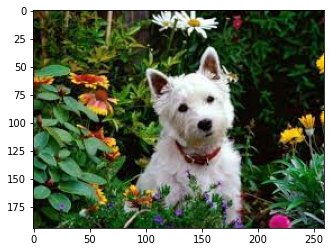

In [35]:
plt.imshow(image)

Percent done: 99.35419771485346


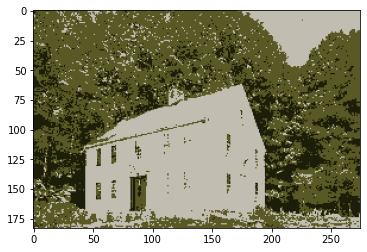

In [78]:
image = plt.imread("houseImage.jpg")
plt.imshow(kmeans(image, 4))

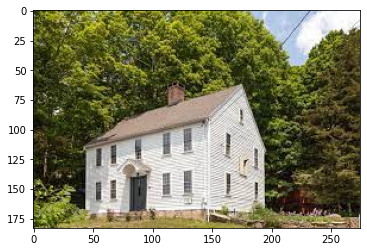

In [38]:
plt.imshow(image)